# **Stock Prices Predictions with DeepAR**

This Notebook will contain the modeling phases needed to predict stock prices using a deep learning model.
The stocks analyzed will be the following:
* IBM
* AAPL (Apple Inc.)
* AMZN (Amazon Inc.)
* GOOGL (Alphabet Inc.)


In [295]:
import sagemaker

# Data preparation

Data must be prepared in order to be processed by DeepAR model:
* Train/test set split
* Save Data locally
* Upload to S3

In [296]:
import os

In [297]:
data_dir = 'stock_deepar'

In [298]:
# The folder we will be used to store json data
data_dir_json = os.path.join(data_dir, 'json')

In [299]:
# The folder we will be used to store csv data
data_dir_csv = os.path.join(data_dir, 'csv')

In [300]:
# The folder we will be used to store training data in json format
data_dir_json_train = os.path.join(data_dir_json, 'train')
data_dir_json_train_ibm = os.path.join(data_dir_json_train, 'IBM')
data_dir_json_train_aapl = os.path.join(data_dir_json_train, 'AAPL')
data_dir_json_train_amzn = os.path.join(data_dir_json_train, 'AMZN')
data_dir_json_train_googl = os.path.join(data_dir_json_train, 'GOOGL')

In [301]:
# The folder we will be used to store test data in json format
data_dir_json_test = os.path.join(data_dir_json, 'test')
data_dir_json_test_ibm = os.path.join(data_dir_json_test, 'IBM')
data_dir_json_test_aapl = os.path.join(data_dir_json_test, 'AAPL')
data_dir_json_test_amzn = os.path.join(data_dir_json_test, 'AMZN')
data_dir_json_test_googl = os.path.join(data_dir_json_test, 'GOOGL')

In [302]:
# The folder we will be used to store validation data in json format
data_dir_json_valid = os.path.join(data_dir_json, 'validation')
data_dir_json_valid_ibm = os.path.join(data_dir_json_valid, 'IBM')
data_dir_json_valid_aapl = os.path.join(data_dir_json_valid, 'AAPL')
data_dir_json_valid_amzn = os.path.join(data_dir_json_valid, 'AMZN')
data_dir_json_valid_googl = os.path.join(data_dir_json_valid, 'GOOGL')

In [303]:
# The folder we will be used to store moving average benchmark model output data in json format
data_dir_json_benchmark_test = os.path.join(data_dir_json, 'benchmark_test')
data_dir_json_benchmark_valid = os.path.join(data_dir_json, 'benchmark_valid')

In [304]:
# initializing train/test dataframe lists to iterate on them
dfs_train = [df_ibm_train, df_aapl_train, df_amzn_train, df_googl_train]
dfs_test = [df_ibm_test, df_aapl_test, df_amzn_test, df_googl_test]
dfs_valid = [df_ibm_valid, df_aapl_valid, df_amzn_valid, df_googl_valid]

## Save Data Locally

In [305]:
if not os.path.exists(data_dir_csv): # Make sure that the folder exists
    os.makedirs(data_dir_csv)

In [306]:
# IBM
df_ibm_train.to_csv(os.path.join(data_dir_csv, 'ibm_train.csv'), header=True, index=True)
df_ibm_test.to_csv(os.path.join(data_dir_csv, 'ibm_test.csv'), header=True, index=True)
df_ibm_valid.to_csv(os.path.join(data_dir_csv, 'ibm_valid.csv'), header=True, index=True)

In [307]:
# Apple Inc.
df_aapl_train.to_csv(os.path.join(data_dir_csv, 'aapl_train.csv'), header=True, index=True)
df_aapl_test.to_csv(os.path.join(data_dir_csv, 'aapl_test.csv'), header=True, index=True)
df_aapl_valid.to_csv(os.path.join(data_dir_csv, 'aapl_valid.csv'), header=True, index=True)

In [308]:
# Amazon.com
df_amzn_train.to_csv(os.path.join(data_dir_csv, 'amzn_train.csv'), header=True, index=True)
df_amzn_test.to_csv(os.path.join(data_dir_csv, 'amzn_test.csv'), header=True, index=True)
df_amzn_valid.to_csv(os.path.join(data_dir_csv, 'amzn_valid.csv'), header=True, index=True)

In [309]:
# Alphabet Inc.
df_googl_train.to_csv(os.path.join(data_dir_csv, 'googl_train.csv'), header=True, index=True)
df_googl_test.to_csv(os.path.join(data_dir_csv, 'googl_test.csv'), header=True, index=True)
df_googl_valid.to_csv(os.path.join(data_dir_csv, 'googl_valid.csv'), header=True, index=True)

### JSON serialization

In order to feed DeepAR model, JSON files must be prepared from data.
I'll generate JSON inputs:
* 'Adj Close' column from each time series will be fed to DeepAR model.

#### DataFrame to JSON conversion

Now I'm going to convert data to JSON file format, in order to feed the DeepAR model correctly

Creating local storage path:

In [310]:
if not os.path.exists(data_dir_json): # Make sure that the folder exists
    os.makedirs(data_dir_json)

Serializing data to json files

In [311]:
from source_deepar.deepar_utils import ts2dar_json

Dataset with the `Adj Close` time series alone:

### Training data:

In [312]:
if not os.path.exists(data_dir_json_train): # Make sure that the folder exists
    os.makedirs(data_dir_json_train)

In [313]:
for df, m in zip(dfs_train, mnemonics):
    ts2dar_json(df, data_dir_json_train, m+'.json')

### Test data:

In [314]:
if not os.path.exists(data_dir_json_test): # Make sure that the folder exists
    os.makedirs(data_dir_json_test)

In [315]:
for df, m in zip(dfs_test, mnemonics):
    ts2dar_json(df, data_dir_json_test, m+'.json')

### Validation data:

In [316]:
if not os.path.exists(data_dir_json_valid): # Make sure that the folder exists
    os.makedirs(data_dir_json_valid)

In [317]:
for df, m in zip(dfs_valid, mnemonics):
    ts2dar_json(df, data_dir_json_valid, m+'.json')

### Benchmark data:

Benchmark data on test data:

In [318]:
if not os.path.exists(data_dir_json_benchmark_test): # Make sure that the folder exists
    os.makedirs(data_dir_json_benchmark_test)

In [319]:
for s, m in zip(ser_test_ma_bmk, mnemonics):
    ts2dar_json(s, data_dir_json_benchmark_test, m+'.json')

Benchmark data on valid data:

In [320]:
if not os.path.exists(data_dir_json_benchmark_valid): # Make sure that the folder exists
    os.makedirs(data_dir_json_benchmark_valid)

In [321]:
for s, m in zip(ser_valid_ma_bmk, mnemonics):
    ts2dar_json(s, data_dir_json_benchmark_valid, m+'.json')

## AWS declarations

Defining training data Location

In [322]:
# Define IAM role and session
role = sagemaker.get_execution_role()
sagemaker_session = sagemaker.Session()

In [323]:
interval ='D'

Define S3 variables for model train artifacts:

In [324]:
#Define training data location
s3_data_key = 'train_artifacts'
s3_bucket = sagemaker_session.default_bucket()
s3_output_path = "s3://{}/{}/{}/{}/output".format(s3_bucket, data_dir, s3_data_key, interval)

In [325]:
#Obtain container image URI for SageMaker-DeepAR algorithm, based on region
region = sagemaker_session.boto_region_name
image_name = sagemaker.image_uris.retrieve("forecasting-deepar", region)
print("Model image : {}".format(image_name))

Model image : 495149712605.dkr.ecr.eu-central-1.amazonaws.com/forecasting-deepar:1


## Upload data to S3

Training input preparation, all data togheter:

In [326]:
# *unique* train/test prefixes
train_prefix   = '{}/{}'.format(data_dir_json, 'train')
test_prefix    = '{}/{}'.format(data_dir_json, 'test')
valid_prefix = '{}/{}'.format(data_dir_json, 'valid')
benchmark_test_prefix = '{}/{}'.format(data_dir_json, 'benchmark_test')
benchmark_valid_prefix = '{}/{}'.format(data_dir_json, 'benchmark_valid')

In [327]:
input_data_train = sagemaker_session.upload_data(path=data_dir_json_train, bucket=s3_bucket, key_prefix=train_prefix)

In [328]:
input_data_test = sagemaker_session.upload_data(path=data_dir_json_test, bucket=s3_bucket, key_prefix=test_prefix)

In [329]:
data_valid = sagemaker_session.upload_data(path=data_dir_json_valid, bucket=s3_bucket, key_prefix=valid_prefix)

In [330]:
data_benchmark_test = sagemaker_session.upload_data(path=data_dir_json_benchmark_test, bucket=s3_bucket, key_prefix=benchmark_test_prefix)

In [331]:
data_benchmark_valid = sagemaker_session.upload_data(path=data_dir_json_benchmark_valid, bucket=s3_bucket, key_prefix=benchmark_valid_prefix)

### Set DeepAR specific hyperparameters

In [332]:
# setting target columns
target_column = 'Adj Close'

In [333]:
# DeepAR estimator parameters    
hyperparameters = {
    "prediction_length": str(prediction_length[1]), #number of time-steps model is trained to predict, always generates forecasts with this length
    "context_length": str(context_length[1]), #number of time-points that the model gets to see before making the prediction, should be about same as the prediction_length
    "time_freq": interval, #granularity of the time series in the dataset
    "epochs": "300", #maximum number of passes over the training data
    "early_stopping_patience": "40", #training stops when no progress is made within the specified number of epochs
    "num_layers": "4", #number of hidden layers in the RNN, typically range from 1 to 4    
    "num_cells": "40", #number of cells to use in each hidden layer of the RNN, typically range from 30 to 100
    "mini_batch_size": "128", #size of mini-batches used during training, typically values range from 32 to 512
    "learning_rate": "1e-3", #learning rate used in training. Typical values range from 1e-4 to 1e-1
    "dropout_rate": "0.12", # dropout rate to use for regularization, typically less than 0.2. 
    "likelihood": "student-T" #noise model used for uncertainty estimates - gaussian/beta/negative-binomial/student-T/deterministic-L1
}

## Estimator Instantiation

In [334]:
from sagemaker.estimator import Estimator

Estimator to be used with all data togheter:

In [335]:
# instantiate a DeepAR estimator
estimator = Estimator(image_uri=image_name,
                      sagemaker_session=sagemaker_session,
                      #image_name=image_name,
                      role=role,
                      instance_count=1,
                      instance_type='ml.c4.xlarge',
                      output_path=s3_output_path,
                      hyperparameters=hyperparameters
                      )

## Training Job Creation

Creation of a training job with stand alone time series (no dynamic features provided). Run only if no model has already been trained before.

In [336]:
from datetime import date

In [337]:
today = date.today()

In [338]:
# increment each time you don't run the training, to keep pointing to the right training artifact package

In [339]:
n = 14

In [340]:
n_daysago = today - datetime.timedelta(n)

In [341]:
all_data_training_job_name = 'deepar-All-{}'.format(n_daysago)

In [342]:
all_data_training_job_name

'deepar-All-2021-04-12'

# SKIP if trainining the model is not needed!

In [293]:
# train and test channels
data_channels = {
    "train": input_data_train,
    "test": input_data_test
}

# SKIP if trainining the model is not needed!

In [294]:
%%time
estimator.fit(inputs=data_channels, job_name=all_data_training_job_name, logs='None')


2021-04-25 19:38:31 Starting - Starting the training job
2021-04-25 19:38:33 Starting - Launching requested ML instances............
2021-04-25 19:39:39 Starting - Preparing the instances for training...........
2021-04-25 19:40:38 Downloading - Downloading input data...
2021-04-25 19:40:59 Training - Downloading the training image......
2021-04-25 19:41:35 Training - Training image download completed. Training in progress.....................................................................................................
2021-04-25 19:50:03 Uploading - Uploading generated training model.
2021-04-25 19:50:11 Completed - Training job completed
CPU times: user 749 ms, sys: 13 ms, total: 762 ms
Wall time: 11min 44s


## Existing Model Instantiation

Instatiation of a model from existing training artifacts (run only if a model has already been trained before).

Model trained on all data together:

In [343]:
all_stocks_model = sagemaker.model.Model(
    model_data='{}/{}/output/model.tar.gz'.format(s3_output_path, all_data_training_job_name),
    image_uri= image_name,
    role=role)  # your role here; could be different name

#trainedmodel.deploy(initial_instance_count=1, instance_type='ml.c4.xlarge')

## Deploy and Create a Predictor

Now that we have trained a model, we can use it to perform predictions by deploying it to a predictor endpoint.

Remember to **delete the endpoint** at the end of this notebook. A cell at the very bottom of this notebook will be provided, but it is always good to keep, front-of-mind.

In [344]:
# importing serializers
from sagemaker.predictor import json_serializer, json_deserializer

Deploying endpoint for global (all stocks together) estimator:

In [345]:
all_data_endpoint_name = 'DeepAR-ml-spp'

#### run it once, then update the endpoint if needed

In [291]:
%%time
all_data_endpoint = all_stocks_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    endpoint_name=all_data_endpoint_name,
    serializer=json_serializer,
    deserializer=json_deserializer
)

---------------------!CPU times: user 375 ms, sys: 37.9 ms, total: 413 ms
Wall time: 10min 32s


#### update endpoint if needed:

All data model:

In [ ]:
%%time
endpoint = all_data_endpoint.update_endpoint(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
)

# Generating Predictions

According to the [inference format](https://docs.aws.amazon.com/sagemaker/latest/dg/deepar-in-formats.html) for DeepAR, the `predictor` expects to see input data in a JSON format, with the following keys:
* **instances**: A list of JSON-formatted time series that should be forecast by the model.
* **configuration** (optional): A dictionary of configuration information for the type of response desired by the request.

Within configuration the following keys can be configured:
* **num_samples**: An integer specifying the number of samples that the model generates when making a probabilistic prediction.
* **output_types**: A list specifying the type of response. We'll ask for **quantiles**, which look at the list of num_samples generated by the model, and generate [quantile estimates](https://en.wikipedia.org/wiki/Quantile) for each time point based on these values.
* **quantiles**: A list that specified which quantiles estimates are generated and returned in the response.


Below is an example of what a JSON query to a DeepAR model endpoint might look like.

```
{
 "instances": [
  { "start": "2009-11-01 00:00:00", "target": [4.0, 10.0, 50.0, 100.0, 113.0] },
  { "start": "1999-01-30", "target": [2.0, 1.0] }
 ],
 "configuration": {
  "num_samples": 50,
  "output_types": ["quantiles"],
  "quantiles": ["0.5", "0.9"]
 }
}
```

## Instantiate a Predictor

Instantiate a predictor to preprocess input data for predictions

In [346]:
from source_deepar.deepar_utils import DeepARPredictor

All data based predictor:

In [347]:
all_data_predictor = DeepARPredictor(endpoint_name=all_data_endpoint_name, sagemaker_session=sagemaker_session)
all_data_predictor.set_prediction_parameters(interval, prediction_length[1])

## Get Predictions

We can now use the model to get a predictions for input time series.

### Predictions on test dataset (using training set as starting point)

Ground truth:

In [348]:
# get all ground truth data from test set 
test_gt = [df_ibm_test.iloc[-prediction_length[1]:]['Adj Close'], df_aapl_test.iloc[-prediction_length[1]:]['Adj Close'],
           df_amzn_test.iloc[-prediction_length[1]:]['Adj Close'], df_googl_test.iloc[-prediction_length[1]:]['Adj Close']]

Prediction input:

In [349]:
# get all input (train)
input_ts = [df_ibm_train, df_aapl_train, df_amzn_train, df_googl_train]

Prediction output on all data together:

In [350]:
# get predictions for all the time series
predictions_from_train = all_data_predictor.predict(input_ts)

Take a look at one of them:

In [351]:
predictions_from_train[0]

,0.1,0.5,0.9
2021-02-27,113.032303,116.685394,120.858788
2021-02-28,112.125458,115.362137,118.430847
2021-03-01,111.564743,115.059288,119.819679
2021-03-02,109.978439,113.672150,118.496826
2021-03-03,106.864647,112.417816,116.461609
2021-03-04,105.848549,110.109467,115.149567
2021-03-05,104.735229,108.828491,114.472664
2021-03-06,102.377281,107.273972,111.212532
2021-03-07,101.408424,105.330238,111.183662
2021-03-08,98.840004,103.664146,110.411163


As we can see, the predictor predicts from the first date not included in the input data and proceeds for 20 days (prediction length). But the pindex are just progressing of one day each row, wich is not stock price progression scheme in real life (e.g.: weekends are not trading days), so I'm going fix the index before going on with the analysis of results:

In [352]:
for i in range(0, len(predictions_from_train)):
    predictions_from_train[i].index = test_gt[i].index

Save data locally:

In [353]:
data_dir_json_prediction = os.path.join(data_dir_json, 'prediction') # The folder we will use for storing data
if not os.path.exists(data_dir_json_prediction): # Make sure that the folder exists
    os.makedirs(data_dir_json_prediction)

In [354]:
# since all of the predictions start and end on the same day, i just use one of them to get the datetime string
start_date = test_gt[0].index[0].date().strftime(format="%Y-%m-%d")
end_date = test_gt[0].index[-1].date().strftime(format="%Y-%m-%d")

Prediction serialization:

In [355]:
for i in range(0, len(predictions_from_train)):
    predictions_from_train[i].to_json(os.path.join(data_dir_json_prediction,
                                             "{}_{} - {}_fromTrain.json".format(mnemonics[i], start_date, end_date)),
                                orient='columns',date_format='iso')

Prediction de-serialization:

In [356]:
dsz_predictions_from_train = []
for i in range(0, len(predictions_from_train)):
    dsz_predictions_from_train.append(
        pd.read_json(os.path.join(data_dir_json_prediction,
                                  "{}_{} - {}_fromTrain.json".format(mnemonics[i], start_date, end_date)),
                     orient='columns', convert_axes=False))

Again, index normalization using target index, before using deserialized data:

In [357]:
for i in range(0, len(dsz_predictions_from_train)):
    dsz_predictions_from_train[i].index = test_gt[i].index

## Predictions on Validation data and future predictions

Now that we've tested our estimator on test set, we would like to see how it behaves on data that it hasn't seen before.
So we'll feed it with validation data we set apart before starting the training phase.
Create a formatted input to send to the deployed `endpoint` passing usual parameters for "configuration". The "instances" will, in this case, just be one instance, defined by the following:
* **start**: The start time from wich we would like to make a prediction.
* **target**: The target will be a the test set if prediction has to be made on validation data, a list with SMA values (constant from train data) is used as input if the prediction must be made on future date.
```
{"start": start_time, "target": [test_set]} # future start_time
```

```
{"start": start_time, "target": [SMA]} # future start_time
```

Creating an array comprising all of the validation dataframes

In [358]:
df_valid = [df_ibm_valid, df_aapl_valid, df_amzn_valid, df_googl_valid]

In [359]:
df_test = [df_ibm_test, df_aapl_test, df_amzn_test, df_googl_test]

Retrieving ground truth data:

In [360]:
valid_gt = [data['Adj Close'] for data in df_valid]

### Predictions on validation data (using test data as starting point)

Retrieving predictions on valid data, starting from test data

In [361]:
predictions_from_test = all_data_predictor.predict(df_test)

Dates index normalization, as usual:

In [362]:
for i in range(0, len(predictions_from_test)):
    predictions_from_test[i].index = valid_gt[i].index

Predictions on validation data from test data serialization:

In [363]:
start_date = valid_gt[0].index[0].date().strftime(format="%Y-%m-%d")
end_date = valid_gt[0].index[-1].date().strftime(format="%Y-%m-%d")

In [364]:
for i in range(0, len(predictions_from_test)):
    predictions_from_test[i].to_json(os.path.join(data_dir_json_prediction,
                                             "{}_{}-{}_fromTest.json".format(mnemonics[i], start_date, end_date)),
                                orient='columns',date_format='iso')

Prediction on validation data de-serialization:

In [365]:
dsz_predictions_from_test = []
for i in range(0, len(predictions_from_test)):
    dsz_predictions_from_test.append(
        pd.read_json(os.path.join(data_dir_json_prediction,
                                  "{}_{}-{}_fromTest.json".format(mnemonics[i], start_date, end_date)),
                     orient='columns', convert_axes=False))

Again, index normalization using target index, before using deserialized data:

In [366]:
for i in range(0, len(dsz_predictions_from_test)):
    dsz_predictions_from_test[i].index = valid_gt[i].index

### Predictions from validation data

Retrieving predictions from the day after validation data ends:

In [367]:
predictions_from_valid = all_data_predictor.predict(df_valid)

Predictions on validation data from test data serialization:

In [368]:
start_date = valid_gt[0].index[-1] + datetime.timedelta(1)
end_date = start_date + datetime.timedelta(days=prediction_length[1])

In [369]:
start_date = start_date.date().strftime(format="%Y-%m-%d")
end_date = end_date.date().strftime(format="%Y-%m-%d")

In [370]:
for i in range(0, len(predictions_from_valid)):
    predictions_from_valid[i].to_json(os.path.join(data_dir_json_prediction,
                                             "{}_{}-{}_fromValid.json".format(mnemonics[i], start_date, end_date)),
                                orient='columns',date_format='iso')

Prediction from validation data de-serialization:

In [371]:
dsz_predictions_from_valid = []
for i in range(0, len(predictions_from_valid)):
    dsz_predictions_from_valid.append(
        pd.read_json(os.path.join(data_dir_json_prediction,
                                  "{}_{}-{}_fromValid.json".format(mnemonics[i], start_date, end_date)),
                     orient='columns', convert_axes=False))

## Results visualization

The quantile data will give us all we need to see the results of our prediction.
* Quantiles 0.1 and 0.9 represent higher and lower bounds for the predicted values.
* Quantile 0.5 represents the median of all sample predictions.

In [372]:
from source_deepar.display_quantiles import display_quantiles

Visualization of predictions from train data

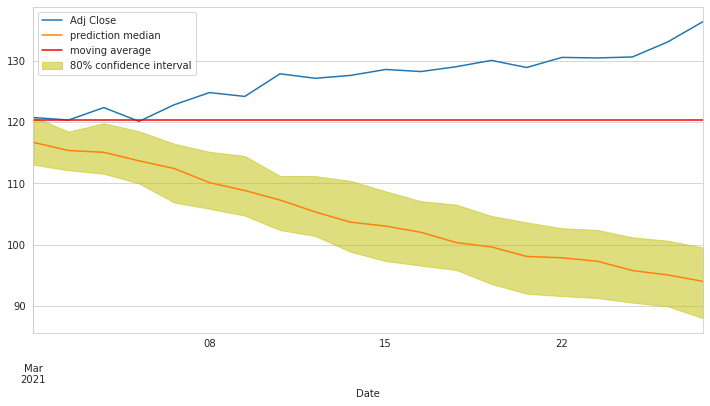

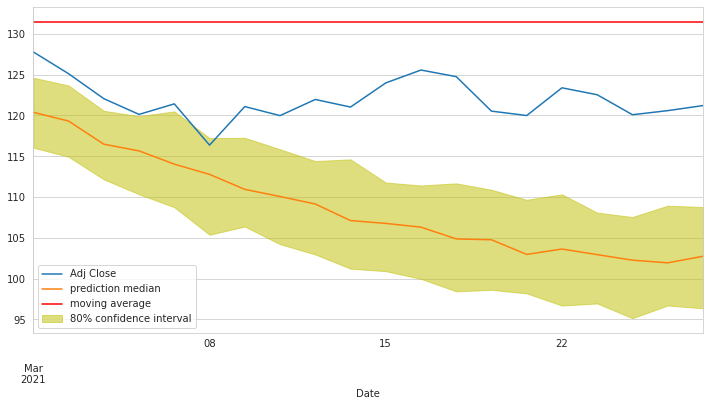

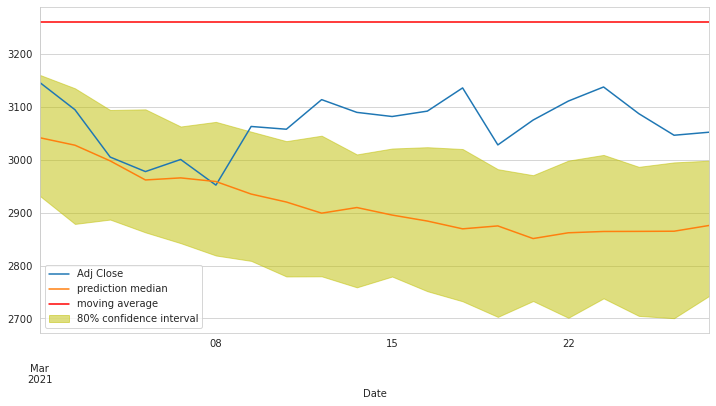

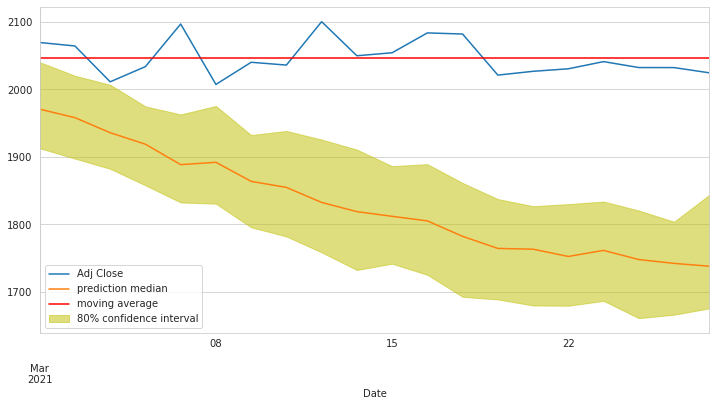

In [373]:
# display predictions
for i in range(len(dsz_predictions_from_train)):
    display_quantiles(dsz_predictions_from_train[i], test_gt[i], ser_test_ma_bmk[i], 'moving average')

Visualization of predictions from test data -> to validation data

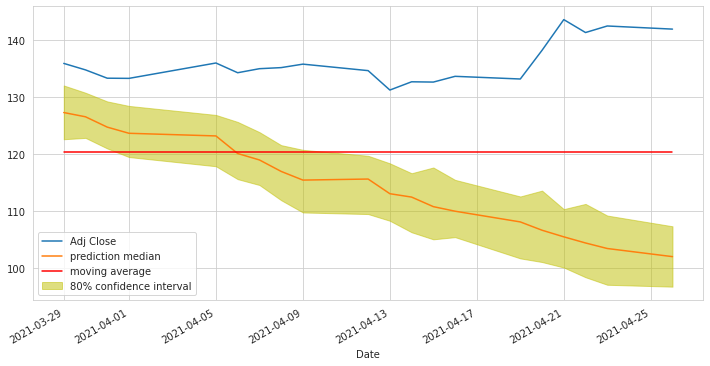

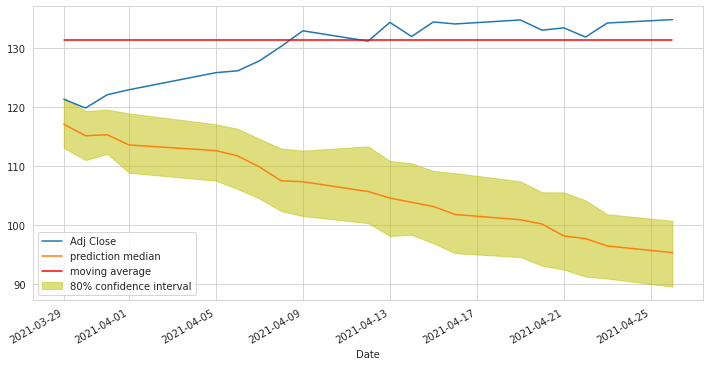

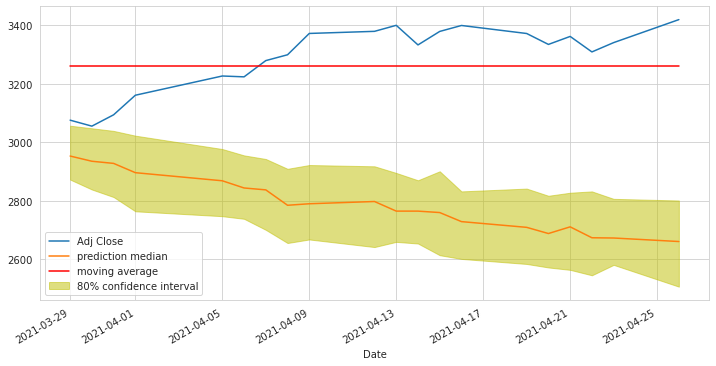

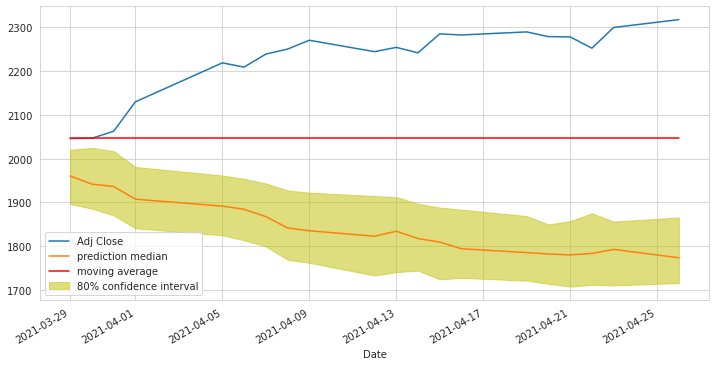

In [374]:
# display predictions
for i in range(len(dsz_predictions_from_test)):
    display_quantiles(dsz_predictions_from_test[i], valid_gt[i], ser_valid_ma_bmk[i], 'moving average')

# Metrics computation

Now that we have predictions on validation dataset, we can compute our metrics and compare it to benchmark model performaces.

## Predictions on test data (from training data)

### IBM Stock prices

Mean Absolute Error

In [375]:
ibm_dar_mae_loss = mean_absolute_error(test_gt[0], dsz_predictions_from_train[0]['0.5'])

In [376]:
print(ibm_dar_mae_loss)

22.620924377448556


Root Mean Squared Error

In [377]:
ibm_dar_mse_loss = mean_squared_error(test_gt[0], dsz_predictions_from_train[0]['0.5'], squared=False)

In [378]:
print(ibm_dar_mse_loss)

25.33216343906317


Mean Absolute Percentage Error

In [379]:
ibm_dar_map_loss = mean_absolute_percentage_error(test_gt[0], dsz_predictions_from_train[0]['0.5'])

In [380]:
print(ibm_dar_map_loss)

0.17506275294723542


R<sup>2</sup> score

In [381]:
ibm_dar_r2_score = r2_score(test_gt[0], dsz_predictions_from_train[0]['0.5'])

In [382]:
print(ibm_dar_r2_score)

-33.98516081275462


### AAPL Stock prices

Mean Absolute Error

In [374]:
aapl_dar_mae_loss = mean_absolute_error(test_gt[1], dsz_predictions_from_train[1]['0.5'])

In [375]:
print(aapl_dar_mae_loss)

13.419894790651602


Root Mean Squared Error

In [376]:
aapl_dar_mse_loss = mean_squared_error(test_gt[1], dsz_predictions_from_train[1]['0.5'], squared=False)

In [377]:
print(aapl_dar_mse_loss)

14.549438701332463


Mean Absolute Percentage Error

In [378]:
aapl_dar_map_loss = mean_absolute_percentage_error(test_gt[1], dsz_predictions_from_train[1]['0.5'])

In [379]:
print(aapl_dar_map_loss)

0.10985877174641386


R<sup>2</sup> score

In [380]:
aapl_dar_r2_score = r2_score(test_gt[1], dsz_predictions_from_train[1]['0.5'])

In [381]:
print(aapl_dar_r2_score)

-33.210339302851516


### AMZN Stock prices

Mean Absolute Error

In [382]:
amzn_dar_mae_loss = mean_absolute_error(test_gt[2], dsz_predictions_from_train[2]['0.5'])

In [383]:
print(amzn_dar_mae_loss)

168.53889160157127


Root Mean Squared Error

In [384]:
amzn_dar_mse_loss = mean_squared_error(test_gt[2], dsz_predictions_from_train[2]['0.5'], squared=False)

In [385]:
print(amzn_dar_mse_loss)

189.584569699258


Mean Absolute Percentage Error

In [386]:
amzn_dar_map_loss = mean_absolute_percentage_error(test_gt[2], dsz_predictions_from_train[2]['0.5'])

In [387]:
print(amzn_dar_map_loss)

0.05461354577167153


R<sup>2</sup> score

In [388]:
amzn_dar_r2_score = r2_score(test_gt[2], dsz_predictions_from_train[2]['0.5'])

In [389]:
print(amzn_dar_r2_score)

-12.213809623897737


### GOOGL Stock prices

Mean Absolute Error

In [390]:
googl_dar_mae_loss = mean_absolute_error(test_gt[3], dsz_predictions_from_train[3]['0.5'])

In [391]:
print(googl_dar_mae_loss)

217.56734619141062


Root Mean Squared Error

In [392]:
googl_dar_mse_loss = mean_squared_error(test_gt[3], dsz_predictions_from_train[3]['0.5'], squared=False)

In [393]:
print(googl_dar_mse_loss)

230.01543431364863


Mean Absolute Percentage Error

In [394]:
googl_dar_map_loss = mean_absolute_percentage_error(test_gt[3], dsz_predictions_from_train[3]['0.5'])

In [395]:
print(googl_dar_map_loss)

0.10620324615351681


R<sup>2</sup> score

In [396]:
googl_dar_r2_score = r2_score(test_gt[3], dsz_predictions_from_train[3]['0.5'])

In [397]:
print(googl_dar_r2_score)

-73.03890044905432


## Predictions on validation data (from test data)

### IBM Stock prices

Mean Absolute Error

In [398]:
ibm_dar_mae_loss = mean_absolute_error(valid_gt[0], dsz_predictions_from_test[0]['0.5'])

In [399]:
print(ibm_dar_mae_loss)

21.82197227477953


Root Mean Squared Error

In [400]:
ibm_dar_mse_loss = mean_squared_error(valid_gt[0], dsz_predictions_from_test[0]['0.5'], squared=False)

In [401]:
print(ibm_dar_mse_loss)

24.300183387118047


Mean Absolute Percentage Error

In [402]:
ibm_dar_map_loss = mean_absolute_percentage_error(valid_gt[0], dsz_predictions_from_test[0]['0.5'])

In [403]:
print(ibm_dar_map_loss)

0.15913748270631026


R<sup>2</sup> score

In [404]:
ibm_dar_r2_score = r2_score(valid_gt[0], dsz_predictions_from_test[0]['0.5'])

In [405]:
print(ibm_dar_r2_score)

-46.170985729772234


### AAPL Stock prices

Mean Absolute Error

In [406]:
aapl_dar_mae_loss = mean_absolute_error(valid_gt[1], dsz_predictions_from_test[1]['0.5'])

In [407]:
print(aapl_dar_mae_loss)

23.76963958740613


Root Mean Squared Error

In [408]:
aapl_dar_mse_loss = mean_squared_error(valid_gt[1], dsz_predictions_from_test[1]['0.5'], squared=False)

In [409]:
print(aapl_dar_mse_loss)

26.29596472825679


Mean Absolute Percentage Error

In [410]:
aapl_dar_map_loss = mean_absolute_percentage_error(valid_gt[1], dsz_predictions_from_test[1]['0.5'])

In [411]:
print(aapl_dar_map_loss)

0.17995116644596656


R<sup>2</sup> score

In [412]:
aapl_dar_r2_score = r2_score(valid_gt[1], dsz_predictions_from_test[1]['0.5'])

In [413]:
print(aapl_dar_r2_score)

-27.51910996762011


### AMZN Stock prices

Mean Absolute Error

In [414]:
amzn_dar_mae_loss = mean_absolute_error(valid_gt[2], dsz_predictions_from_test[2]['0.5'])

In [415]:
print(amzn_dar_mae_loss)

506.9873901367162


Root Mean Squared Error

In [416]:
amzn_dar_mse_loss = mean_squared_error(valid_gt[2], dsz_predictions_from_test[2]['0.5'], squared=False)

In [417]:
print(amzn_dar_mse_loss)

542.3272488838458


Mean Absolute Percentage Error

In [418]:
amzn_dar_map_loss = mean_absolute_percentage_error(valid_gt[2], dsz_predictions_from_test[2]['0.5'])

In [419]:
print(amzn_dar_map_loss)

0.15227375464292486


R<sup>2</sup> score

In [420]:
amzn_dar_r2_score = r2_score(valid_gt[2], dsz_predictions_from_test[2]['0.5'])

In [421]:
print(amzn_dar_r2_score)

-22.980787442139395


### GOOGL Stock prices

Mean Absolute Error

In [422]:
googl_dar_mae_loss = mean_absolute_error(valid_gt[3], dsz_predictions_from_test[3]['0.5'])

In [423]:
print(googl_dar_mae_loss)

378.3567749023488


Root Mean Squared Error

In [424]:
googl_dar_mse_loss = mean_squared_error(valid_gt[3], dsz_predictions_from_test[3]['0.5'], squared=False)

In [425]:
print(googl_dar_mse_loss)

404.20375955131203


Mean Absolute Percentage Error

In [426]:
googl_dar_map_loss = mean_absolute_percentage_error(valid_gt[3], dsz_predictions_from_test[3]['0.5'])

In [427]:
print(googl_dar_map_loss)

0.16784777567693468


R<sup>2</sup> score

In [428]:
googl_dar_r2_score = r2_score(valid_gt[3], dsz_predictions_from_test[3]['0.5'])

In [429]:
print(googl_dar_r2_score)

-22.9667924732652


## Conclusions

With reference to all the metrics, the DeepAR method has performed worse than the simple moving average in Adjusted Close stock prices predictions. Maybe better performances could be achieved by means of additional feature analyis.

## Delete the Endpoint

Try your code out on different time series. You may want to tweak your DeepAR hyperparameters and see if you can improve the performance of this predictor.

When you're done with evaluating the predictor (any predictor), make sure to delete the endpoint.

In [ ]:
## TODO: delete the endpoint
all_data_predictor.delete_endpoint()